<a href="https://colab.research.google.com/github/nikki423n/ml-for-bioe/blob/master/Amanda_Nikki_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import all the necessary folders.

In [14]:
#Import all of necessary folders
import pandas as pd
import numpy as np
import sys
from scipy.optimize import least_squares
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict

# Import classifier models

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Split the data into X = all the independent variables, or variables used for predicting, and Y = actual ages of all the people, or the dependent variable. Get rid of the age group dataset (column 1) completely because it gives an unfair look at what the age of our patients are.

In [15]:
file_path = "/content/drive/MyDrive/NHANES_age_prediction.csv" # Import Data Set
df = pd.read_csv(file_path, usecols=[3, 4, 5, 6, 7, 8, 9])
# df is an array with gender, physical activity, BMI, glucose level, diabetic, oral glucose test, insulin
df.iloc[:, 0] = df.iloc[:, 0] - 1 # subtracting 1 from column 1 so that women = 1, male = 0
df.iloc[:, 1] = df.iloc[:, 1] - 1 # subtracting 1 from column 2 so that inactive = 1, active = 0
df.iloc[:, 4] = df.iloc[:, 4] - 1 # subtracting 1 from column 4 so that no diabetes = 1, diabetes = 0

# this way, a positive number means women are positively correlated with age
X = df.values
y = pd.read_csv(file_path, usecols=[2])
Y = y.values
#Y is array with actual ages of people, extracted column 2

Perform Ordinary Least Squares and Leave One Out Cross Validation to find the mean squared error, the weights of all of the dependent variables, and p values of all of these weights. Then, graph the weights of each of the dependent variables.

Average R^2 Value: 0.11342332930640524
Average Mean Squared Error: 338.8624138852984
Intercept: [5.53240904]
Coefficients: [-0.78509909  1.19772539  0.69811117  0.02332432  5.72453283  0.13737837
 -0.63960574]


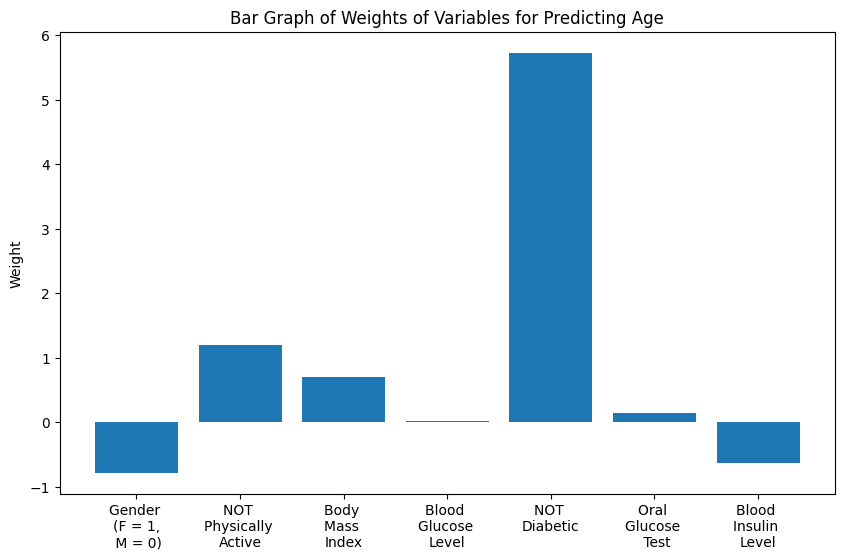

In [16]:
kfold = KFold(n_splits=100) # 100 splits, less computationally expensive for large dataset
mse_values = [] # for storing mean squared error
coefs = []
r2_values = []

for train_idx, test_idx in kfold.split(X):
    # Make training and testing data splits so testing data is hidden from training data
    X_train, X_test = X[train_idx], X[test_idx]
    Y_train, Y_test = Y[train_idx], Y[test_idx]


    model = LinearRegression()
    model.fit(X_train, Y_train) # Perform linear regression and fit the model

    Y_pred = model.predict(X_test) # Make predictions from trained model

    mse = mean_squared_error(Y_test, Y_pred) # compare predictions and real ages to find mean squared error
    mse_values.append(mse) #Store MSE for each fold in array
    coefs.append(model.coef_.flatten()) #store coefficients for each fold in array

    r2 = r2_score(Y_test, Y_pred)  # Calculate R^2 value for each fold
    r2_values.append(r2)

average_mse = np.mean(mse_values) # calculate averages
average_coefs = np.mean(coefs, axis = 0)
average_r2 = np.mean(r2_values)
print(f"Average R^2 Value: {average_r2}")
print(f"Average Mean Squared Error: {average_mse}")
print("Intercept:", model.intercept_)
print("Coefficients:", average_coefs)

#name different variables
Var1 = "Gender \n(F = 1,\n M = 0)"
Var2 = "NOT \nPhysically \nActive"
Var3 = "Body \nMass \nIndex"
Var4 = "Blood \nGlucose \nLevel"
Var5 = "NOT \nDiabetic"
Var6 = "Oral \nGlucose \n Test"
Var7 = "Blood \nInsulin \nLevel"

# bar graph of coefficients
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(average_coefs) + 1), average_coefs)
plt.ylabel('Weight')
plt.title('Bar Graph of Weights of Variables for Predicting Age')
plt.xticks(range(1, len(average_coefs) + 1), [Var1, Var2, Var3, Var4, Var5, Var6, Var7])
plt.show()


Visualize actual ages versus predicted ages, and compare to "perfect" model which would follow y=x

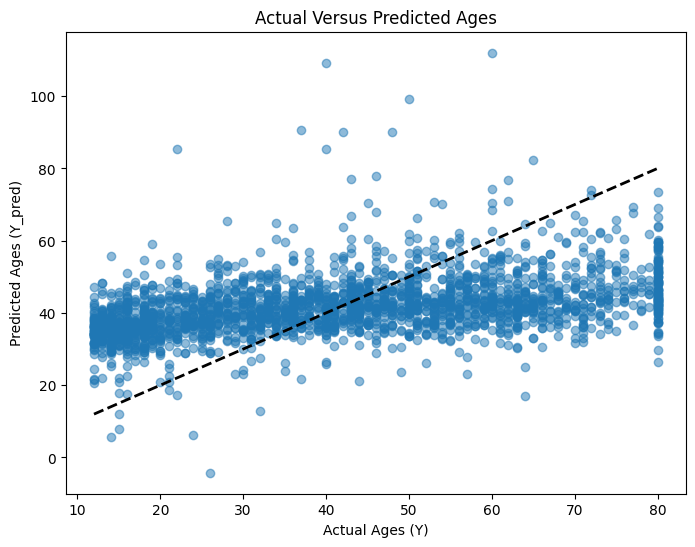

In [17]:
X = df.values
y = pd.read_csv(file_path, usecols=[2])# Predicting column 2 = age group
Y = y.values

model = LinearRegression()
model.fit(X, y)

Y_pred = model.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(y, Y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Line y = x for reference
plt.xlabel('Actual Ages (Y)')
plt.ylabel('Predicted Ages (Y_pred)')
plt.title('Actual Versus Predicted Ages')
plt.show()

# model is always predicting about 40


Do PCA on dataset.

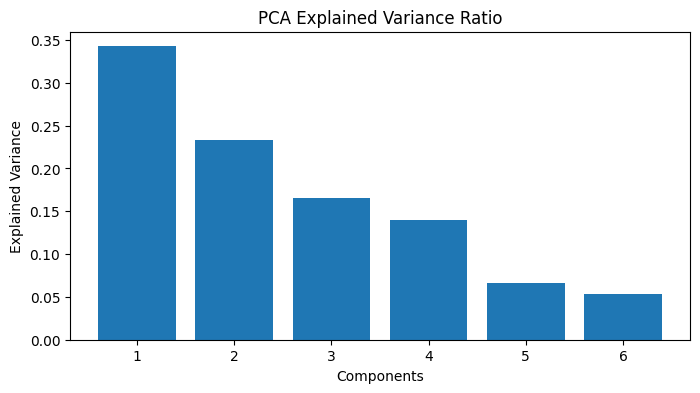

PCA Loadings:
              PC1       PC2       PC3       PC4       PC5       PC6
PAQ605 -0.056026 -0.050998  0.145492 -0.972255 -0.115367  0.120427
BMXBMI  0.328545  0.313808 -0.420938 -0.020759 -0.776094 -0.116795
LBXGLU  0.617215 -0.145437  0.379895  0.122387 -0.105240  0.653850
DIQ010 -0.148835  0.888000  0.419713  0.030529  0.052995  0.096973
LBXGLT  0.566082 -0.009597  0.374349 -0.081677  0.142620 -0.715758
LBXIN   0.406650  0.298555 -0.583974 -0.178065  0.591730  0.150411


In [18]:
# Change Adult in age_group to 0 and senior to 1

scaler = MinMaxScaler()
scaler = StandardScaler()

np.set_printoptions(threshold=sys.maxsize)

trainSIZE = 0.1
testSIZE = 0.9

age = ageX.values
data = dataX.values

data_scaled = scaler.fit_transform(data)
age_scaled = scaler.fit_transform(age)

## Classification using Gaussian Naive Bayes classifier

pca = PCA()
classifier = DecisionTreeClassifier()
#classifier = GaussianNB()
#classifier = GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42)

# using the train test split function
data_train, data_test, age_train, age_test = train_test_split(data_scaled, age,
                                   random_state=104,
                                   train_size=trainSIZE,
                                   test_size=testSIZE,
                                   shuffle=True)

X_transformed = pca.fit_transform(data_train)
classifier.fit(X_transformed, age_train)


# Explained variance ratio
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
#plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(),'r')
#plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(),'r.')
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.title('PCA Explained Variance Ratio')
plt.show()


loadings = pca.components_.T
loading_matrix = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(len(loadings[0]))], index=dataX.columns)

print("PCA Loadings:\n", loading_matrix)

Scores Plot of First 2 PC's

Text(0.5, 1.0, 'PCA Scores Plot with Age Color Map')

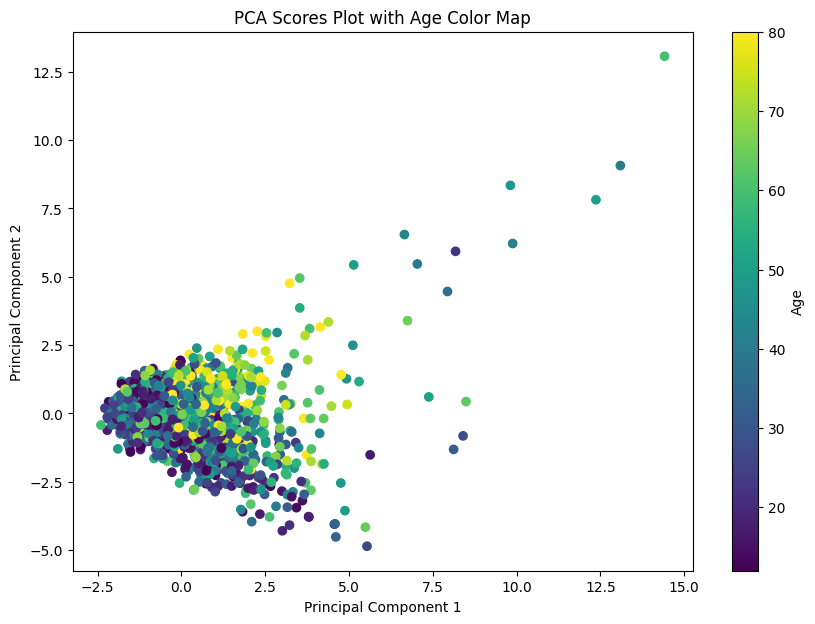

In [19]:
age = Y # Extract age values as a 1D array

# Standardize the data
X_scaled = scaler.fit_transform(df)

# Apply PCA for 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
sc = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=age, cmap='viridis')
plt.colorbar(sc, label='Age')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scores Plot with Age Color Map')

Using PCA
R2 score = -0.27315399824544495
mse =  518.2257435397368
Using PLSR
R2 score = 0.17155579354271744
mse =  337.21067165807676
Using OLS
R2 score = 0.17407268901798345
mse =  336.1861922699752


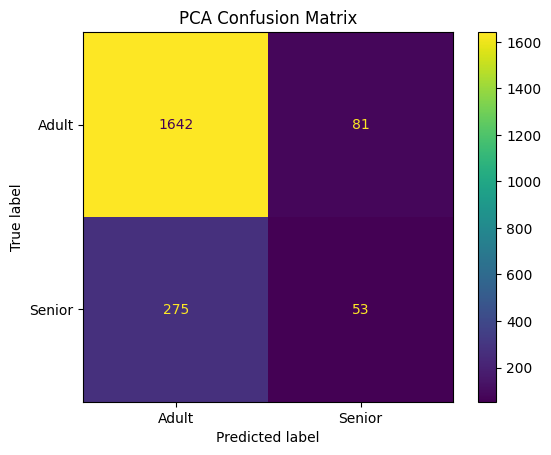

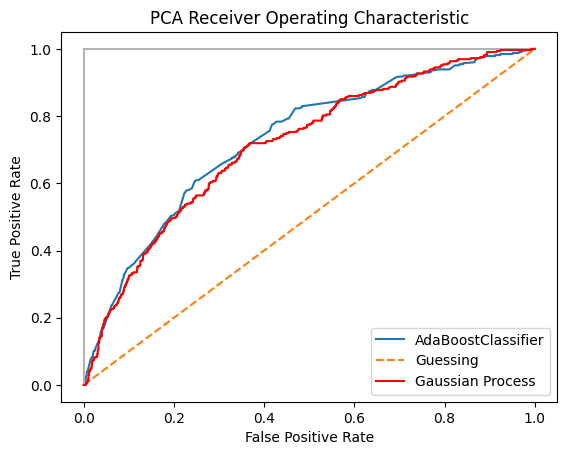

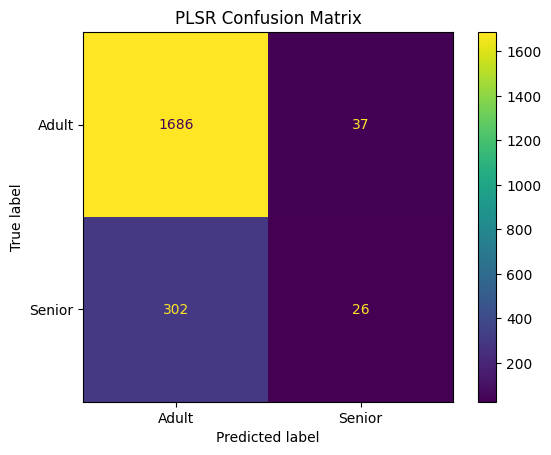

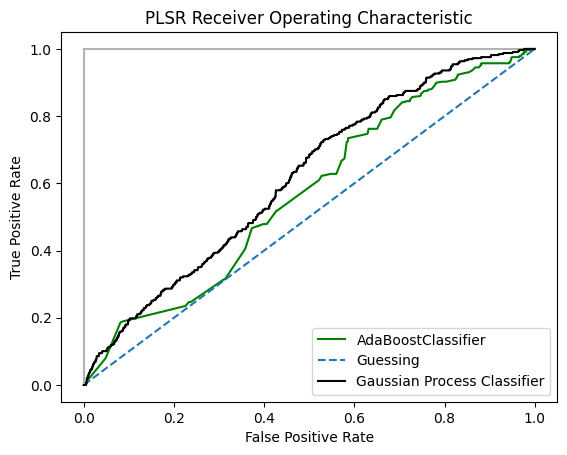

In [20]:
#ROC curve, R^2 prediction
#plot weight to see what factor

#y-axis = wieght

#- do p value for each of the numbers, factor that these even contribute, want to figure out why we can't get the correct predictions
#- p value of BMX coefficient value

np.set_printoptions(threshold=sys.maxsize)

dataOut = pd.read_csv('/content/drive/MyDrive/NHANES_age_prediction.csv', usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

dataOut.age_group[dataOut.age_group == 'Adult'] = 0
dataOut.age_group[dataOut.age_group == 'Senior'] = 1

dataOut.to_csv("/content/drive/MyDrive/NHANES_age_prediction.csv", index=False)

age_group = pd.read_csv('/content/drive/MyDrive/NHANES_age_prediction.csv', usecols=[1])
ageX = pd.read_csv('/content/drive/MyDrive/NHANES_age_prediction.csv', usecols=[2])
dataX = pd.read_csv('/content/drive/MyDrive/NHANES_age_prediction.csv', usecols=[4, 5, 6, 7, 8, 9])

# Change Adult in age_group to 0 and senior to 1

scaler = MinMaxScaler()
scaler = StandardScaler()

np.set_printoptions(threshold=sys.maxsize)

trainSIZE = 0.1
testSIZE = 0.9

age = ageX.values
data = dataX.values

data_scaled = scaler.fit_transform(data)
age_scaled = scaler.fit_transform(age)

## Classification using Gaussian Naive Bayes classifier

pca = PCA()
classifier = DecisionTreeClassifier()
#classifier = GaussianNB()
#classifier = GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42)

# using the train test split function
data_train, data_test, age_train, age_test = train_test_split(data_scaled, age,
                                   random_state=104,
                                   train_size=trainSIZE,
                                   test_size=testSIZE,
                                   shuffle=True)

X_transformed = pca.fit_transform(data_train)
classifier.fit(X_transformed, age_train)


newdata = data_test

# transform new data using already fitted pca
newdata_transformed = pca.transform(newdata)

# predict age using the trained classifier
age_predict = classifier.predict(newdata_transformed)

age_cv = cross_val_predict(classifier, data_test, age_test, cv=10)

score = r2_score(age_test, age_cv)
mse = mean_squared_error(age_test, age_cv)

print('Using PCA')
print('R2 score =', score)
print('mse = ', mse)

pls = PLSRegression(n_components=6)
pls.fit(data_train, age_train)

# Use cross validation to predict the age
age_cv = cross_val_predict(pls, data_test, age_test, cv=20)

score = r2_score(age_test, age_cv)
mse = mean_squared_error(age_test, age_cv)

print('Using PLSR')
print('R2 score =', score)
print('mse = ', mse)


ols = LinearRegression()
ols.fit(data_train, age_train)

age_ols = ols.predict(data_test)

# Use cross validation to predict the age
age_cv = cross_val_predict(ols, data_test, age_test, cv=10)

score = r2_score(age_test, age_cv)
mse = mean_squared_error(age_test, age_cv)

print('Using OLS')
print('R2 score =', score)
print('mse = ', mse)


####  Define classifier
####
pca = PCA()
#classifier = DecisionTreeClassifier()
#classifier = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=42)
#classifier = GaussianNB()
#classifier =  KNeighborsClassifier(2)
#classifier = MLPClassifier(alpha=1, max_iter=1000, random_state=42)
#classifier = QuadraticDiscriminantAnalysis()
#classifier = GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42)
#classifier =  RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=42)
classifier = AdaBoostClassifier(algorithm="SAMME", random_state=42);

####

#age_group.age_group[age_group.age_group == 'Adult'] = 0
#age_group.age_group[age_group.age_group == 'Senior'] = 1

# using the train test split function
data_train, data_test, agegroup_train, agegroup_test = train_test_split(data_scaled, age_group,
                                   random_state=104,
                                   train_size=trainSIZE,
                                   test_size=testSIZE,
                                   shuffle=True)


X_transformed = pca.fit_transform(data_train)
# classifier.fit(X_transformed, age_group)
classifier.fit(X_transformed, agegroup_train)




newdata = data_test

# transform new data using already fitted pca
newdata_transformed = pca.transform(newdata)

# predict age using the trained classifier
agegroup_predict = classifier.predict(newdata_transformed)

confusion_matrix = metrics.confusion_matrix(agegroup_test, agegroup_predict)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Adult', 'Senior'])

cm_display.plot()

plt.title('PCA Confusion Matrix')



#labels = {'Adult', 'Senior'}
agegroup_score1 = classifier.predict_proba(data_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(agegroup_test, agegroup_score1)


plt.figure()
plt.title('PCA Receiver Operating Characteristic')
plt.plot(false_positive_rate1, true_positive_rate1, label='AdaBoostClassifier')
plt.plot([0, 1], ls="--", label='Guessing')
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#plt.show()


####  Define classifier
####
pca = PCA()
#classifier = DecisionTreeClassifier()
#classifier = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=42)
#classifier = GaussianNB()
#classifier =  KNeighborsClassifier(2)
#classifier = MLPClassifier(alpha=1, max_iter=1000, random_state=42)
#classifier = QuadraticDiscriminantAnalysis()
classifier = GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42)
#classifier =  RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=42)
#classifier = AdaBoostClassifier(algorithm="SAMME", random_state=42);

####

#age_group.age_group[age_group.age_group == 'Adult'] = 0
#age_group.age_group[age_group.age_group == 'Senior'] = 1

# using the train test split function
data_train, data_test, agegroup_train, agegroup_test = train_test_split(data_scaled, age_group,
                                   random_state=104,
                                   train_size=trainSIZE,
                                   test_size=testSIZE,
                                   shuffle=True)


X_transformed = pca.fit_transform(data_train)
# classifier.fit(X_transformed, age_group)
classifier.fit(X_transformed, agegroup_train)

newdata = data_test

# transform new data using already fitted pca
newdata_transformed = pca.transform(newdata)

# predict age using the trained classifier
agegroup_predict = classifier.predict(newdata_transformed)


agegroup_score1 = classifier.predict_proba(data_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(agegroup_test, agegroup_score1)


plt.title('PCA Receiver Operating Characteristic')
plt.plot(false_positive_rate1, true_positive_rate1, 'r', label='Gaussian Process')

plt.legend()




#X_transformed = pca.fit_transform(data_train)
# classifier.fit(X_transformed, age_group)
#classifier.fit(X_transformed, agegroup_train)

classifier = AdaBoostClassifier(algorithm="SAMME", random_state=42);


pls = PLSRegression(n_components=6)
pls.fit(data_train, age_train)

X_transformed = pls.transform(data_train)
# classifier.fit(X_transformed, age_group)
classifier.fit(X_transformed, agegroup_train)


newdata = data_test

# transform new data using already fitted pca
newdata_transformed = pls.transform(newdata)


# predict age using the trained classifier
agegroup_predict = classifier.predict(newdata_transformed)

confusion_matrix = metrics.confusion_matrix(agegroup_test, agegroup_predict)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Adult', 'Senior'])

cm_display.plot()

plt.title('PLSR Confusion Matrix')

agegroup_score1 = classifier.predict_proba(data_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(agegroup_test, agegroup_score1)


plt.figure()
plt.title('PLSR Receiver Operating Characteristic')
plt.plot(false_positive_rate1, true_positive_rate1, 'g', label='AdaBoostClassifier')
plt.plot([0, 1], ls="--", label='Guessing')
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')




classifier = GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42)

pls = PLSRegression(n_components=6)
pls.fit(data_train, age_train)

X_transformed = pls.transform(data_train)
# classifier.fit(X_transformed, age_group)
classifier.fit(X_transformed, agegroup_train)

newdata = data_test

# transform new data using already fitted pca
newdata_transformed = pls.transform(newdata)


agegroup_predict = classifier.predict(newdata_transformed)
agegroup_score1 = classifier.predict_proba(data_test)[:,1]

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(agegroup_test, agegroup_score1)

plt.plot(false_positive_rate1, true_positive_rate1, 'k', label='Gaussian Process Classifier')


plt.legend()